# Load libraries

In [2]:
import pandas as pd
from sklearn.cross_validation import KFold,StratifiedKFold
import datetime
import numpy as np
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import pickle
from sklearn import metrics
import sys

import matplotlib.pyplot as plt

C:\Users\edve\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
plt.style.use('ggplot')

%matplotlib inline

#  
#  
# Load data

In [4]:
df = pd.read_csv('data/cs-training.csv')

In [5]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
df.rename(columns={df.columns[0]:'id'}, inplace=True)

In [7]:
df.head()

,id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [8]:
len(df)

150000

#  
#  
# Check nans

In [15]:
features_with_nan = []
for c in df.columns:
    nan_count = len(df[df[c].isnull()])
    if nan_count>0:
        features_with_nan.append(c)
        print(c, nan_count, 1.0*nan_count/len(df))
        
print(features_with_nan)

('MonthlyIncome', 29731, 0.19820666666666667)
('NumberOfDependents', 3924, 0.02616)
['MonthlyIncome', 'NumberOfDependents']


#  
#  
# Get an idea of the target variable

In [18]:
df.groupby("SeriousDlqin2yrs").count()[['id']]/len(df)

,id
SeriousDlqin2yrs,
0,0.93316
1,0.06684


#  
#  
# Get an idea of the features

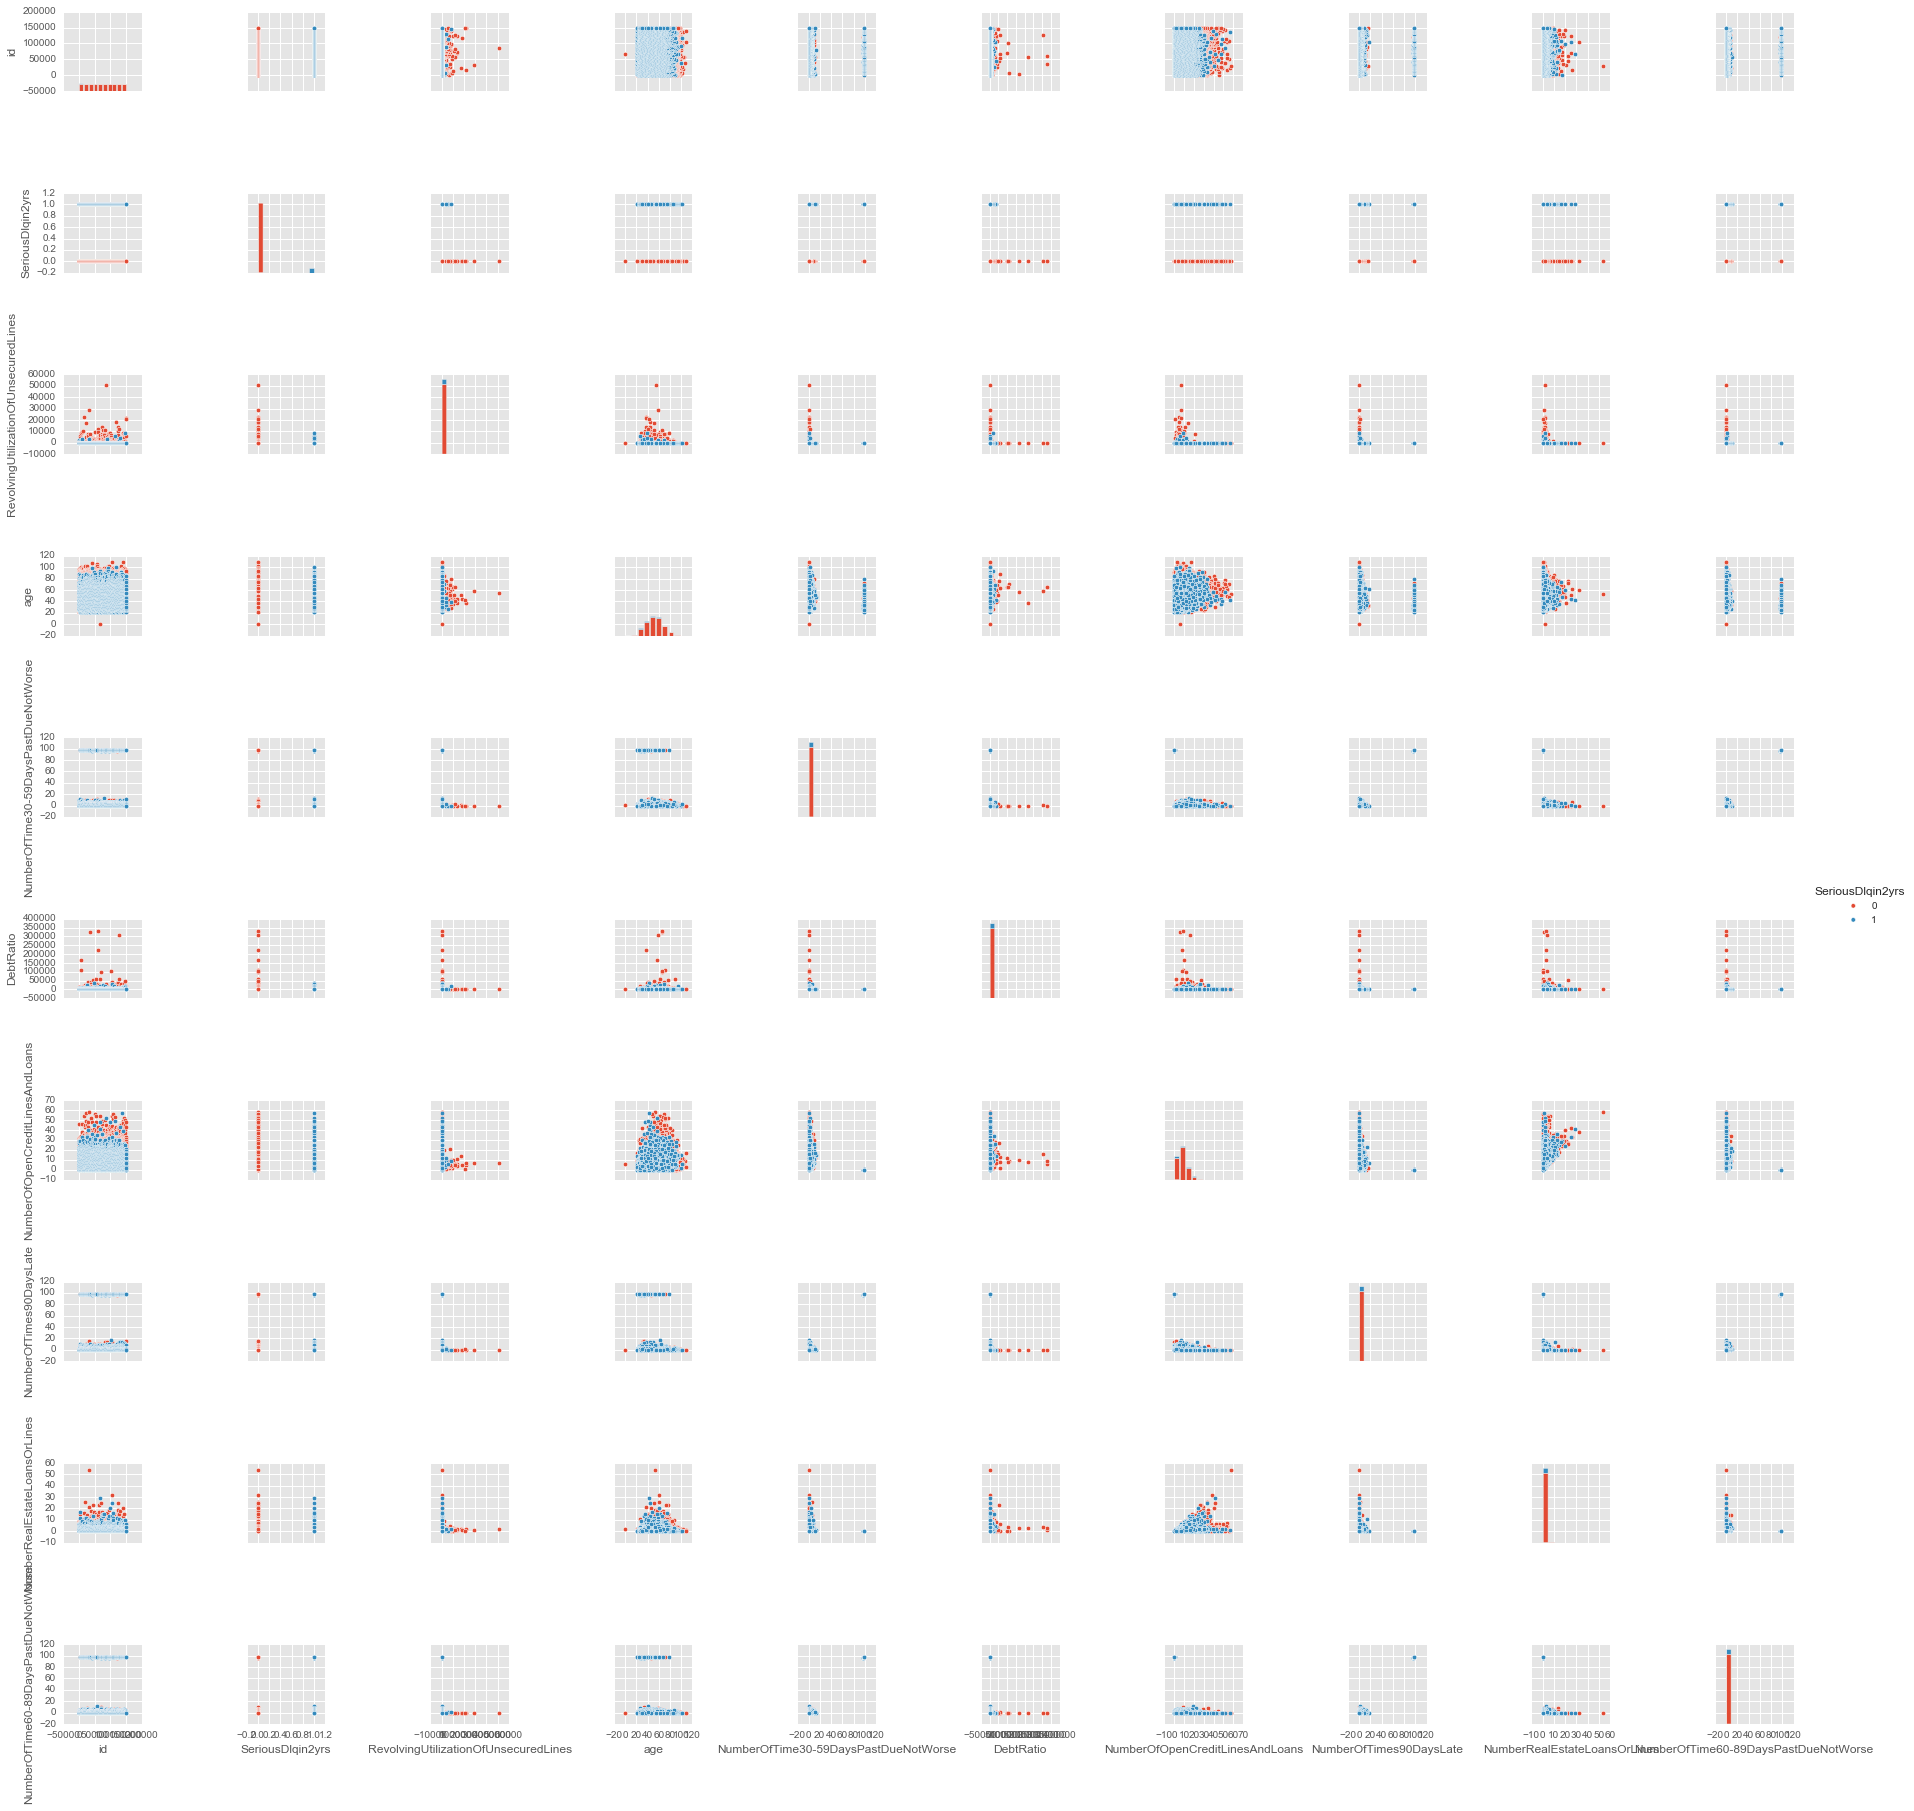

In [16]:
sns.pairplot(df[[c for c in df.columns if c not in features_with_nan]], hue="SeriousDlqin2yrs")

#  
#  
# Utils - BACKUP

In [9]:
# import pandas as pd
# from sklearn.cross_validation import KFold,StratifiedKFold
# import datetime
# import numpy as np
# from sklearn import linear_model
# from sklearn import metrics
# from sklearn.metrics import roc_auc_score
# from sklearn import metrics



# def getAuc(actuals,predictions):
#     fpr, tpr, thresholds = metrics.roc_curve(actuals,predictions)
#     return metrics.auc(fpr, tpr)



# def getResultsWithCV(dataframe, 
#                      clf, 
#                      target_column, 
#                      features, 
#                      folds=5, 
#                      balance_classes=False, 
#                      balancing_factor=3):

#     kf = StratifiedKFold(y=dataframe[target_column], 
#                            n_folds=folds, 
#                            shuffle=True,
#                            random_state=42)

#     if list(dataframe.index.values) != range(len(dataframe)):
#         print "ERROR WITH INDEX"
#         return 0
    
#     AUCs = [] 
#     for train_index, test_index in kf:
           
#         # Train the model
#         dataframe_train = dataframe.iloc[train_index]
#         if balance_classes==True:
#             class_1_samples = len(dataframe_train[dataframe_train[target_column]==1])
#             dataframe_train = pd.concat([dataframe_train[dataframe_train[target_column]==0].sample(n=class_1_samples*balancing_factor),
#                                          dataframe_train[dataframe_train[target_column]==1]])     
#         X_train = dataframe_train[features].values
#         y_train = dataframe_train[target_column].values     
#         clf.fit(X_train, y_train)
               
#         # Calculate the predictions
#         dataframe_test = dataframe.iloc[test_index]
#         X_test = dataframe_test[features].values
#         y_test = dataframe_test[target_column].values   
        
        
#         predictions_proba = [x[1] for x in clf.predict_proba(X_test)]
#         dataframe.loc[test_index, 'prediction_proba'] = predictions_proba
        
#         fold_auc = getAuc(y_test,predictions_proba)
#         AUCs.append(fold_auc)

#         print round(fold_auc,4)
#     print (round(np.mean(AUCs),4), round(np.std(AUCs),5))